In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import armageddon

In [19]:
from scipy.interpolate import interp1d

Cd=1. 
H=8000.
rho0=1.2

init_altitude=100e3
n=100

radius = 1.02058734e+02


#def anal(radius, density=1): 
    
init_altitude=100e3
n=100
velocity = 19.2e3
density = 3300
angle = 18.3*np.pi/180

# calcluating
A = np.pi*radius*radius
m = density*A*(4/3)*radius
beta = -H*Cd*A/(2*m*np.sin(angle)) 
C = beta * np.exp(-init_altitude/H) - np.log(velocity)

z = np.linspace(init_altitude, 0, n) # full range
v = np.exp(beta*np.exp(-z/H) -C)

ke = 0.5*m*v*v 
ke_loss = np.diff(ke)/np.diff(z)*4.11e-10

f =  interp1d(z[1:]/1e3,ke_loss)
#return f

plt.plot(z[3], f(z[3]))

# chel.. data 
chel_df = pd.read_csv("data/ChelyabinskEnergyAltitude.csv")
arr = chel_df.to_numpy()

z_chel = arr[:,0]
dedz = arr[:,1]

z_max = np.amax(z_chel)
z_min = np.amin(z_chel)
# actual arrays 



#z = np.linspace(z_max*1e3, z_min*1e3, n)
z = np.linspace(init_altitude, 0, n) # full range
v = np.exp(beta*np.exp(-z/H) -C)


#plt.plot(v,z)
#plt.show
ke = 0.5*m*v*v 
ke_loss = np.diff(ke)/np.diff(z)*4.11e-10

#plt.plot(dedz,z_chel)
#plt.plot(ke_loss, z[1:]/1e3)

f = anal(radius)

# PLOT ANALYTICAL SOLUTION
#plt.plot(f(z[1:]/1e3),z[1:]/1e3)
#plt.ylim(22,40)
#plt.xlim(0,80)



ValueError: A value in x_new is above the interpolation range.

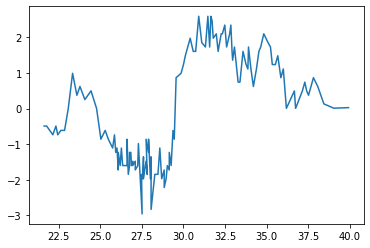

In [3]:
dd = np.diff(dedz)
plt.plot(z_chel[1:], dd)

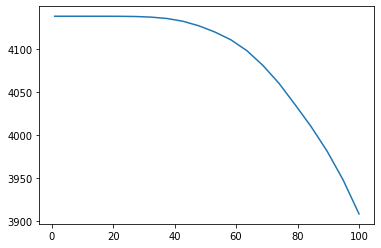

In [4]:
def error_function(radius, density=1):
    f = anal(radius, density)
    total = 0
    for i in range(len(z_chel)):
        total += abs(f(z_chel[i])-dedz[i])
    return total

rad_vals = np.linspace(1,100,20)
errors = np.zeros(20)

for i in range(len(errors)): 
    errors[i] = error_function(rad_vals[i])

#plt.plot(errors)
plt.plot(rad_vals, errors)


In [7]:
import armageddon

# We first create a Planet class called "earth", 
# which contains all the constants, atmospheric density functions, etc.
earth = armageddon.Planet()

In [8]:
# A user would call the impact function for one scenario like so...
result, outcome = earth.impact(
    radius=10, angle=45, strength=1e5, velocity=20e3, density=3000)

In [9]:
# This is equivalent to calling the three individual functions like so...
result = earth.solve_atmospheric_entry(
    radius=10, angle=45, strength=1e5, velocity=20e3, density=3000)
result = earth.calculate_energy(result)
outcome = earth.analyse_outcome(result)


In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def exponential_decay(t, y): return -0.5 * y

In [ ]:
sol = solve_ivp(exponential_decay, [0, 10], [2])

In [ ]:
print(sol.t)

In [ ]:
def dvdt()

In [ ]:
def J(x): 
    return x**2-2*x

In [ ]:
J = error_function
J(156,1.19481459)

In [ ]:
iter = 100
u = np.zeros(iter)
u[0] = 1
for j in range(iter-1): 
    c = 1/np.sqrt(j+10000)
    dJ = (J(156.859,u[j] + c) - J(156.859,u[j]-c))/(2*c)
    u[j+1] = u[j] - 1/(j+10000)*dJ

In [ ]:
vJ = np.vectorize(J)

In [ ]:
f(49.17747435)

In [ ]:
f(48.17747435)
f(90)

In [ ]:
x = np.linspace(1,200,100)
y = np.zeros(100)
for i in range(100): 
    y[i] = error_function(x[i])
plt.plot(x,y)

In [ ]:
from noisyopt import minimizeSPSA

In [ ]:
bounds = [[10, 1000], [0.9, 10]]


In [ ]:
#x0 = np.array([120, 0.99])

def SPSA(func, x0, bounds, niter=100, a=1.0, alpha=0.602, c=1.0, gamma=0.101):
    """
    Minimization of an objective function by a simultaneous perturbation
    stochastic approximation.
    This algorithm approximates the gradient of the function by finite differences
    along stochastic directions Deltak. The elements of Deltak are drawn from
    +- 1 with probability one half. The gradient is approximated from the 
    symmetric difference f(xk + ck*Deltak) - f(xk - ck*Deltak), where the evaluation
    step size ck is scaled according ck =  c/(k+1)**gamma.
    The algorithm takes a step of size ak = a/(0.01*niter+k+1)**alpha along the
    negative gradient.
    
    We need to choose the parameters (a, alpha, c, gamma).

    Parameters
    ----------
    func: function 
        function to be minimized:
    x0: array-like
        initial guess for parameters 
    bounds: array-like
        bounds on the variables
    niter: int
        number of iterations after which to terminate the algorithm
    a: float
       scaling parameter for step size
    alpha: float
        scaling exponent for step size
    c: float
       scaling parameter for evaluation step size
    gamma: float
        scaling exponent for evaluation step size 
    Returns
    -------
    Optimized parameters to minimize input function over bounds
    """
    A = 0.01 * niter

    bounds = np.asarray(bounds)
    project = lambda x: np.clip(x, bounds[:, 0], bounds[:, 1])

    N = len(x0)
    x = x0
    for k in range(niter):
        ak = a/(k+1.0+A)**alpha
        ck = c/(k+1.0)**gamma
        Deltak = np.random.choice([-1, 1], size=N)
        fkwargs = dict()
        # check points are in boundaries
        xplus = project(x + ck*Deltak)
        xminus = project(x - ck*Deltak)
        grad = (func(xplus, **fkwargs) - func(xminus, **fkwargs)) / (xplus-xminus)
        x = project(x - ak*grad)
    return x


In [ ]:
res = SPSA(vJ, bounds=bounds, x0=x0, niter=10)

In [ ]:
print(res)

In [ ]:
fg

In [ ]:
import armageddon

# We first create a Planet class called "earth", 
# which contains all the constants, atmospheric density functions, etc.
earth = armageddon.Planet()

In [ ]:
# A user would call the impact function for one scenario like so...
result, outcome = earth.impact(
    radius=10, angle=45, strength=1e5, velocity=20e3, density=3000)

In [ ]:
# This is equivalent to calling the three individual functions like so...
result = earth.solve_atmospheric_entry(
    radius=10, angle=45, strength=1e5, velocity=20e3, density=3000)
result = earth.calculate_energy(result)
#outcome = earth.analyse_outcome(result)


In [10]:
result

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,20000.000000,1.256637e+07,45.00,100000.000000,0.000000,10.000000,0.00,0.000000
1,20000.346704,1.256637e+07,44.99,99292.918298,696.254262,10.000000,0.05,-0.029434
2,20000.693360,1.256637e+07,44.99,98585.889368,1392.660706,10.000000,0.10,-0.029430
3,20001.039966,1.256637e+07,44.98,97878.913236,2089.219370,10.000000,0.15,-0.029425
4,20001.386519,1.256637e+07,44.98,97171.989928,2785.930291,10.000000,0.20,-0.029420
...,...,...,...,...,...,...,...,...
8726,26.769282,1.684062e+06,89.94,4.493092,82248.087089,109.674771,436.30,0.000014
8727,26.767553,1.684062e+06,89.94,3.154672,82248.088432,109.674771,436.35,0.000014
8728,26.765824,1.684061e+06,89.94,1.816339,82248.089775,109.674771,436.40,0.000014
8729,26.764095,1.684061e+06,89.94,0.478091,82248.091118,109.674771,436.45,0.000014


In [11]:
# chel.. data 
chel_df = pd.read_csv("data/ChelyabinskEnergyAltitude.csv")
arr = chel_df.to_numpy()

z_chel = arr[:,0]
dedz = arr[:,1]

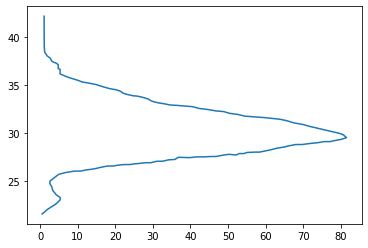

In [12]:
plt.plot(dedz,z_chel)
#plt.plot(ke_loss, z[1:]/1e3)


In [13]:
solver_dedz = result['dedz'].to_numpy()
solver_z = result['altitude'].to_numpy()

In [14]:
solver_z /= 1e3  # convert to km 



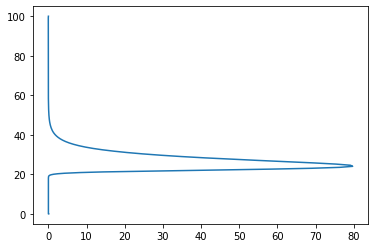

In [15]:
plt.plot(solver_dedz, solver_z)

In [22]:
def strength_radius(rad = 150, st=1e6): 
    #velocity = 19.2e3
    #density = 3300
    #angle = 18.3
    
    # calcluating
    result, outcome = earth.impact(radius=rad, angle=18.3, strength=st, velocity=19.2e3, density=3300)
    #print(result.head())
    solver_dedz = result['dedz'].to_numpy()
    solver_z = result['altitude'].to_numpy()    
    solver_z /= 1e3  # convert to km     
    #plt.plot(solver_dedz,solver_z)
    #f = interp1d(solver_z,solver_dedz)
    return solver_dedz, solver_z


(21, 43)

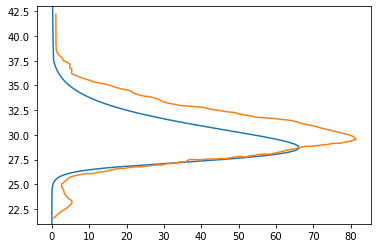

In [30]:
x,y = strength_radius(rad = 8,st = 2e6)
#vf = np.vectorize(func)
#x = np.linspace(0,100,100)
#y = vf(x)
plt.plot(x,y)
plt.plot(dedz,z_chel)
plt.ylim(21,43)
#plt.xlim(0,200)

In [ ]:
        result_sci = solve_ivp(self.f_com_analytical, (0, t_max), initial_state, t_eval=None, method='RK45', atol=tol, rtol=tol)


In [18]:
a,b,c,d,e = earth.compare_analytical_numerical(self, radius=10, angle=45, strength=1e5, velocity=20e3, density=3000,
        init_altitude=100e3, n=100, radians=False)

NameError: name 'self' is not defined

In [ ]:
def error_function(rad=1000, st=1e5):
    f = strength_radius(rad, st)
    total = 0
    for i in range(len(z_chel)):
        total += abs(f(z_chel[i])-dedz[i])
    return total

rad_vals = np.linspace(10,200,10)
errors = np.zeros(10)

for i in range(len(errors)): 
    errors[i] = error_function(rad_vals[i], 1e6)

#plt.plot(errors)
plt.plot(rad_vals, errors)




In [ ]:
bounds = [[200, 300], [1e5, 1e5]]
vJ = np.vectorize(error_function)
x0 = np.array([100, 1e5])

from noisyopt import minimizeSPSA
res = minimizeSPSA(vJ, bounds=bounds, x0=x0, niter=10, paired=False)

In [19]:
fiducial_impact = {'radius': 10.0,'angle': 10.0,'strength': 0.0,'velocity': 0.0,'density': 0.0}
    
earth = armageddon.Planet()
ensemble = armageddon.ensemble.solve_ensemble(earth,fiducial_impact,variables=[], radians=False,rmin=8, rmax=12)


In [20]:
ensemble

,burst_altitude
